# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# Mini simulation - 5 times including printing full results

doors = [1,2,3]
switch = []
noswitch = []

for i in range (0,5):
    
    # Generate random int between 1 and 3 to represent car
    car = np.random.randint(1,4)
    
    # Generate int between 1 and 3 to represent players choice
    playerchoice = np.random.randint(1,4)
    
    # Empty list to store doors which could be revealed
    goatoptions = []

    for door in doors:
        if door != car:
            if door != playerchoice:
                goatoptions.append(door)
                
    # Selects a door to reveal containing goat
    reveal = np.random.choice(goatoptions)

    # Empty list to store value for door which player can switch to
    playerswitcheddoor = []

    for door in doors:
        if door != reveal:
            if door != playerchoice:
                playerswitcheddoor.append(door)
    
    # Record win/loss if player switches
    if playerswitcheddoor[0] == car:
        switch.append(1)
    else:
        switch.append(0)
    
    # Record win/loss if player doesn't switch
    if playerchoice == car:
        noswitch.append(1)
    else:
        noswitch.append(0)

            
    print(f'Car is behind door number: {car}')
    print(f'Player chose door number: {playerchoice}')
    print(f'A goat is revealed behind door number: {reveal}')
    print(f'Player can choose to swith to door number: {playerswitcheddoor[0]} \n')


print(f'Switches win/lose: {switch}')
print(f'No switches win/lose {noswitch}')

Car is behind door number: 2
Player chose door number: 2
A goat is revealed behind door number: 1
Player can choose to swith to door number: 3 

Car is behind door number: 2
Player chose door number: 1
A goat is revealed behind door number: 3
Player can choose to swith to door number: 2 

Car is behind door number: 3
Player chose door number: 1
A goat is revealed behind door number: 2
Player can choose to swith to door number: 3 

Car is behind door number: 1
Player chose door number: 1
A goat is revealed behind door number: 2
Player can choose to swith to door number: 3 

Car is behind door number: 2
Player chose door number: 2
A goat is revealed behind door number: 3
Player can choose to swith to door number: 1 

Switches win/lose: [0, 1, 1, 0, 0]
No switches win/lose [1, 0, 0, 1, 1]


In [78]:
# Full simulation

doors = [1,2,3]
switch = []
noswitch = []

for i in range (0,10**4):
    
    # Generate random int between 1 and 3 to represent car
    car = np.random.randint(1,4)
    
    # Generate int between 1 and 3 to represent players choice
    playerchoice = np.random.randint(1,4)
    
    # Empty list to store doors which could be revealed
    goatoptions = []

    for door in doors:
        if door != car:
            if door != playerchoice:
                goatoptions.append(door)
                
    # Selects a door to reveal containing goat
    reveal = np.random.choice(goatoptions)

    # Empty list to store value for door which player can switch to
    playerswitcheddoor = []

    for door in doors:
        if door != reveal:
            if door != playerchoice:
                playerswitcheddoor.append(door)
    
    # Record win/loss if player switches
    if playerswitcheddoor[0] == car:
        switch.append(1)
    else:
        switch.append(0)
    
    # Record win/loss if player doesn't switch
    if playerchoice == car:
        noswitch.append(1)
    else:
        noswitch.append(0)

print(f'Probability of winning if player switches: {np.mean(switch)}')
print(f'Probability of winning if a player does not switch: {np.mean(noswitch)}')

Probability of winning if player switches: 0.6654
Probability of winning if a player does not switch: 0.3346


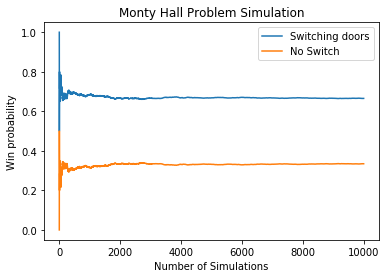

In [79]:
# Lineplot

# x values in range 1 to 10*4
xs = np.arange(1,10**4,1)

# y values for switch and noswitch, take mean of lists
# Use slicing to get entries up to x where x is number of simulations
yswitch = [ np.mean(switch[:x]) for x in xs]
ynoswitch = [ np.mean(noswitch[:x]) for x in xs]

# Plot lineplot for switch
sns.lineplot(xs, yswitch, label = 'Switching doors')
# Plot lineplot for no switch
sns.lineplot(xs, ynoswitch, label = 'No Switch')

plt.title("Monty Hall Problem Simulation")
plt.xlabel("Number of Simulations")
plt.ylabel("Win probability")
plt.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 